# Lesson 3: Data everywhere

In the past lesson we have created a dataset out from students knowledge of Python, Pandas and Numpy. But that's not the only way to represente datasets.

Let's dive into other representations of data, like text, images and audio.

In [1]:
# Step 0. Import libraries and custom functions
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import matplotlib.pyplot as plt
import wave

KeyboardInterrupt: 

In [7]:
# 1. Text representation
# 1.1 Let's create a dataset
df_samp = pd.DataFrame({'mag':[4,3,2,1], 'val':[3.14,2.71,1,0],
                        'cat':['real','real','nat','nat'],
                        'text':['this is pi','this is e_number','one','zero']})
df_samp

,mag,val,cat,text
0,4,3.14,real,this is pi
1,3,2.71,real,this is e_number
2,2,1.00,nat,one
3,1,0.00,nat,zero


In [8]:
# Now, computer can only read numbers so how can we convert this dataset to a
# numeric representation?
# 1.2 Categoricals: You can represent them with a yes, it is or  no, it's not
df_samp["cat"] = df_samp["cat"].apply(lambda x:1 if x == "nat" else 0)
df_samp


,mag,val,cat,text
0,4,3.14,0,this is pi
1,3,2.71,0,this is e_number
2,2,1.00,1,one
3,1,0.00,1,zero


In [9]:
# 1.3 Text: You can create a representation of text, encoding position
# this  is   pi    e   one  zero
#   1    1    1    0    0    0
#   1    1    0    1    0    0
#   0    0    0    0    1    0
#   0    0    0    0    0    1
# But this could be hard for long text, so let's use the sklearn library
# To vectorize our text
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df_samp["text"])

In [10]:
# Then we convert the vectorized text into a matrix
text_matrix = bow.toarray()
text_matrix

array([[0, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [11]:
# And we get the word associated with each column
names = vectorizer.get_feature_names_out()
names

array(['e_number', 'is', 'one', 'pi', 'this', 'zero'], dtype=object)

In [12]:
# Then we create our dataframe
df_vecwo = pd.DataFrame(data= text_matrix, columns= names)
df_vecwo

,e_number,is,one,pi,this,zero
0,0,1,0,1,1,0
1,1,1,0,0,1,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1


In [13]:
# And we append it to our original dataframe
df_final = pd.concat([df_samp, df_vecwo], axis= 1)
df_final

,mag,val,cat,text,e_number,is,one,pi,this,zero
0,4,3.14,0,this is pi,0,1,0,1,1,0
1,3,2.71,0,this is e_number,1,1,0,0,1,0
2,2,1.00,1,one,0,0,1,0,0,0
3,1,0.00,1,zero,0,0,0,0,0,1


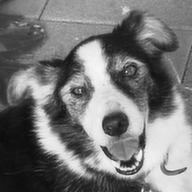

In [15]:
# 1.4 Images
# Now, images are also a representation of what we perceive with our eyes
# So if you have a capturing device like a camera, you'll get that perception
# into an electronic image, which is a 2D representation
# Let's open an image and get a view
my_image = Image.open("husky.jpeg")
my_image

In [10]:
# And we'll see that an image is just a matrix


In [12]:
# 1.5 Audio
# Now audio is a representation of what we perceive with our ears
# With the right audio capturing device, we can transform the audio
# into a digital representation
#with wave.open('bark.wav') as f:
#  buffer = f.readframes(f.getnframes())
#  interleaved = np.frombuffer(buffer, dtype=f'int{f.getsampwidth()*8}')
#  my_audio = np.reshape(interleaved, (-1, f.getnchannels()))

In [13]:
# Which is also, a matrix


In [14]:
# Credits
# Bark audio: https://mixkit.co/free-sound-effects/
# Dog image: https://stackoverflow.com/questions/7941743/saving-gray-images-in-jpeg-using-matlab-imwrite
# Audio convertion: https://stackoverflow.com/questions/54174160/how-to-get-numpy-arrays-output-of-wav-file-format#54174291